In [46]:
import numpy as np

In [47]:
# diopside = cpx
# enstatite = opx

cij_forsterite = np.array([[320.5,  68.15,  71.6,     0,     0,     0],
  [ 68.15,  196.5,  76.8,     0,     0,     0],
  [  71.6,   76.8, 233.5,     0,     0,     0],
  [   0,      0,      0,     64,     0,     0],
  [   0,      0,      0,      0,    77,     0],
  [   0,      0,      0,      0,     0,  78.7]])

cij_enstatite = np.array([[  236.90,   79.60,   63.20,    0.00,    0.00,    0.00],
  [    79.60,  180.50,   56.80,    0.00,    0.00,    0.00],
  [    63.20,   56.80,  230.40,    0.00,    0.00,    0.00],
  [     0.00,    0.00,    0.00,   84.30,    0.00,    0.00],
  [     0.00,    0.00,    0.00,    0.00,   79.40,    0.00],
  [     0.00,    0.00,    0.00,    0.00,    0.00,   80.10]])
cij_diopside = np.array([[  228.10,   78.80,   70.20,    0.00,    7.90,    0.00],
  [    78.80,  181.10,   61.10,    0.00,    5.90,    0.00],
  [    70.20,   61.10,  245.40,    0.00,   39.70,    0.00],
  [     0.00,    0.00,    0.00,   78.90,    0.00,    6.40],
  [     7.90,    5.90,   39.70,    0.00,   68.20,    0.00],
  [     0.00,    0.00,    0.00,    6.40,    0.00,   78.10]])

In [48]:
cij = [cij_forsterite, cij_enstatite]

In [49]:
rho_forsterite = 3355
rho_enstatite = 3306
rho_diopside = 3286

In [50]:
density = [rho_forsterite, rho_enstatite]

In [51]:
from sage import EBSD
ebsdfile = EBSD("ebsd.ctf")

In [52]:
# ds = ebsdfile.downsampleEBSD()
ds = ebsdfile.get_ebsd_data()

In [53]:
ds

,Phase,X,Y,Bands,Error,Euler1,Euler2,Euler3,MAD,BC,BS
0,0,0.0,0.0,0,5,360.0,180.0,0.0,0.0,0,0
1,0,10.0,0.0,0,5,360.0,180.0,0.0,0.0,0,0
2,0,20.0,0.0,0,5,360.0,180.0,0.0,0.0,0,0
3,0,30.0,0.0,0,5,360.0,180.0,0.0,0.0,0,0
4,0,40.0,0.0,0,5,360.0,180.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7436871,0,35330.0,21010.0,0,5,360.0,180.0,0.0,0.0,0,0
7436872,0,35340.0,21010.0,0,5,360.0,180.0,0.0,0.0,0,0
7436873,0,35350.0,21010.0,0,5,360.0,180.0,0.0,0.0,0,0
7436874,0,35360.0,21010.0,0,5,360.0,180.0,0.0,0.0,0,0


In [54]:
forsterite = ebsdfile.get_euler_angles(phase = 2, data = ds)
forsterite

,Euler1,Euler2,Euler3
0,87.4642,92.8881,189.4273
1,87.3722,92.8697,189.8949
2,88.0216,93.0424,189.4486
3,87.4349,92.8845,190.2057
4,87.5331,92.9261,189.5653
...,...,...,...
1394633,84.6656,116.6140,205.8327
1394634,84.4332,116.7462,205.0268
1394635,84.6351,116.8354,205.1278
1394636,84.9668,117.0409,204.6467


In [36]:
enstatite = ebsdfile.get_euler_angles(phase = 3, data = ds)

In [37]:
diopside = ebsdfile.get_euler_angles(phase = 1, data = ds)

In [38]:
euler_angles = [forsterite, enstatite]

In [39]:
from sage import Anisotropy
from sage import EBSD

In [40]:
x, y, rho = ebsdfile.getAnisotropyForEBSD(cij = cij, euler_angles= euler_angles, density=density)

In [41]:
from sage import Tensor
tensor = Tensor()

import pandas as pd
print("Output rotated tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor.tensor_to_voigt(x))))

Output rotated tensor in voigt matrix convention:
            0           1           2          3          4          5
0  226.496782   72.774588   73.279176  -0.349680  -0.824986   0.834207
1   72.774588  244.730454   71.175315   2.345770   0.446452   3.071319
2   73.279176   71.175315  224.047786   0.175633  -0.100553  -0.071797
3   -0.349680    2.345770    0.175633  80.768306   1.589629   0.965186
4   -0.824986    0.446452   -0.100553   1.589629  76.009366   0.298628
5    0.834207    3.071319   -0.071797   0.965186   0.298628  79.789056


In [42]:
from sage import Anisotropy
# density = 3298

In [43]:
t = Anisotropy(tensor.tensor_to_voigt(x)*10**9, rho)

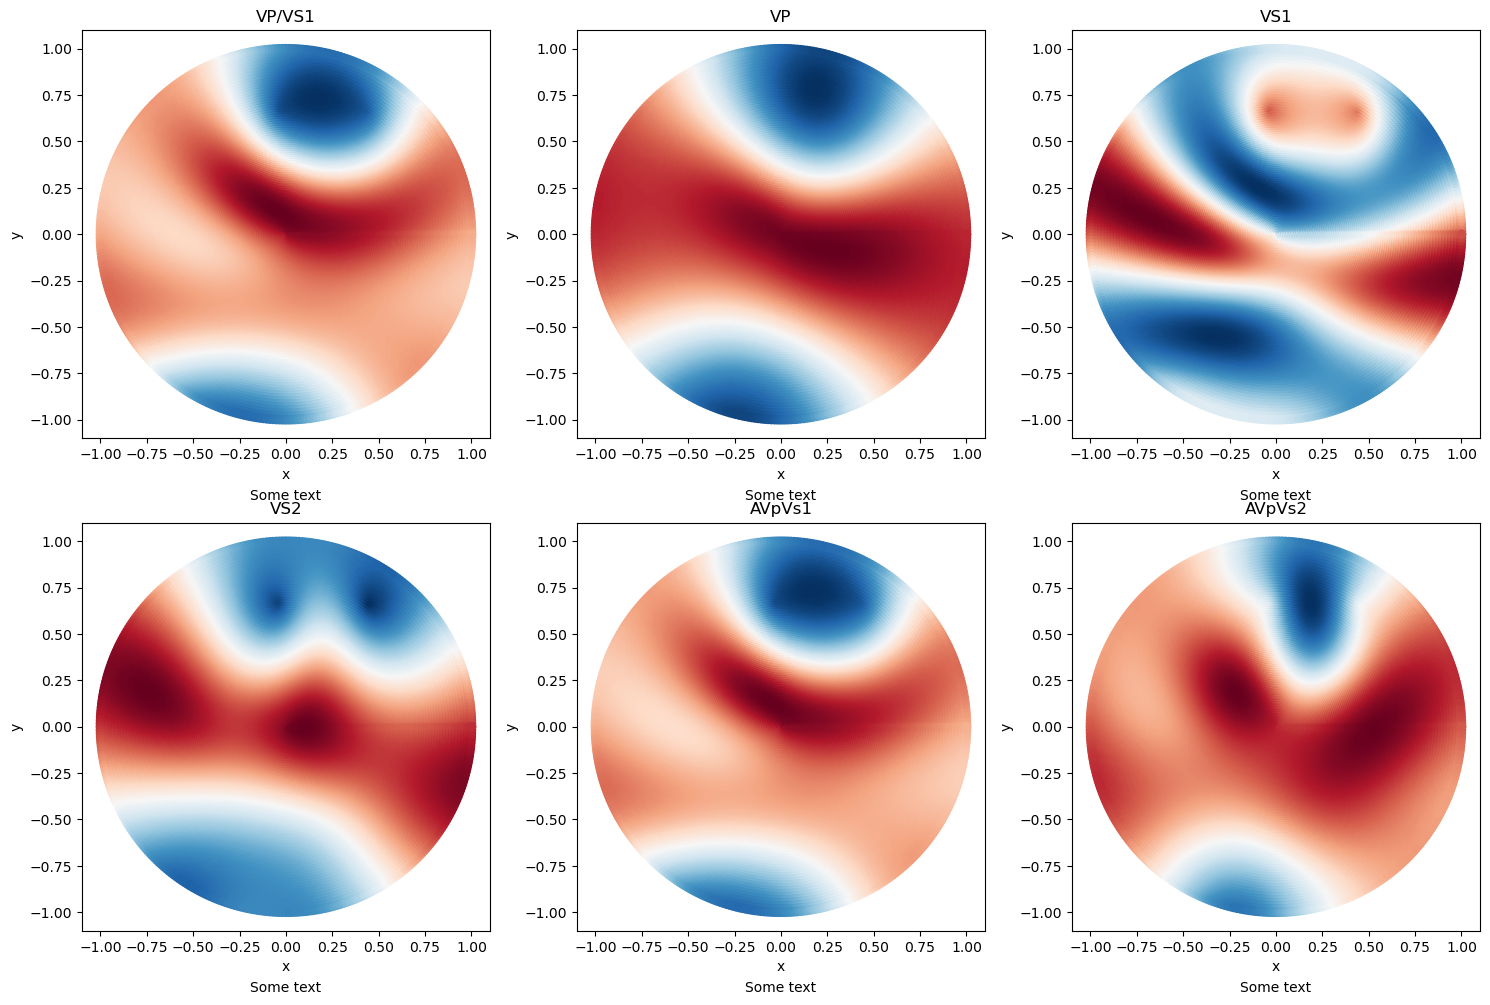

In [44]:
t.plot()

In [45]:
rho

3335.6773480519028

In [20]:
tensor.tensor_to_voigt(x)*10**9

array([[ 2.26496782e+11,  7.27745880e+10,  7.32791755e+10,
        -3.49679565e+08, -8.24985659e+08,  8.34207120e+08],
       [ 7.27745880e+10,  2.44730454e+11,  7.11753148e+10,
         2.34576955e+09,  4.46451630e+08,  3.07131864e+09],
       [ 7.32791755e+10,  7.11753148e+10,  2.24047786e+11,
         1.75633187e+08, -1.00553235e+08, -7.17965238e+07],
       [-3.49679565e+08,  2.34576955e+09,  1.75633187e+08,
         8.07683059e+10,  1.58962896e+09,  9.65185544e+08],
       [-8.24985659e+08,  4.46451630e+08, -1.00553235e+08,
         1.58962896e+09,  7.60093662e+10,  2.98628355e+08],
       [ 8.34207120e+08,  3.07131864e+09, -7.17965238e+07,
         9.65185544e+08,  2.98628355e+08,  7.97890565e+10]])

In [21]:
cij_forsterite = np.array([[320.5,  68.15,  71.6,     0,     0,     0],
  [ 68.15,  196.5,  76.8,     0,     0,     0],
  [  71.6,   76.8, 233.5,     0,     0,     0],
  [   0,      0,      0,     64,     0,     0],
  [   0,      0,      0,      0,    77,     0],
  [   0,      0,      0,      0,     0,  78.7]])

In [24]:
t = Anisotropy((cij_forsterite)*10**9, rho)

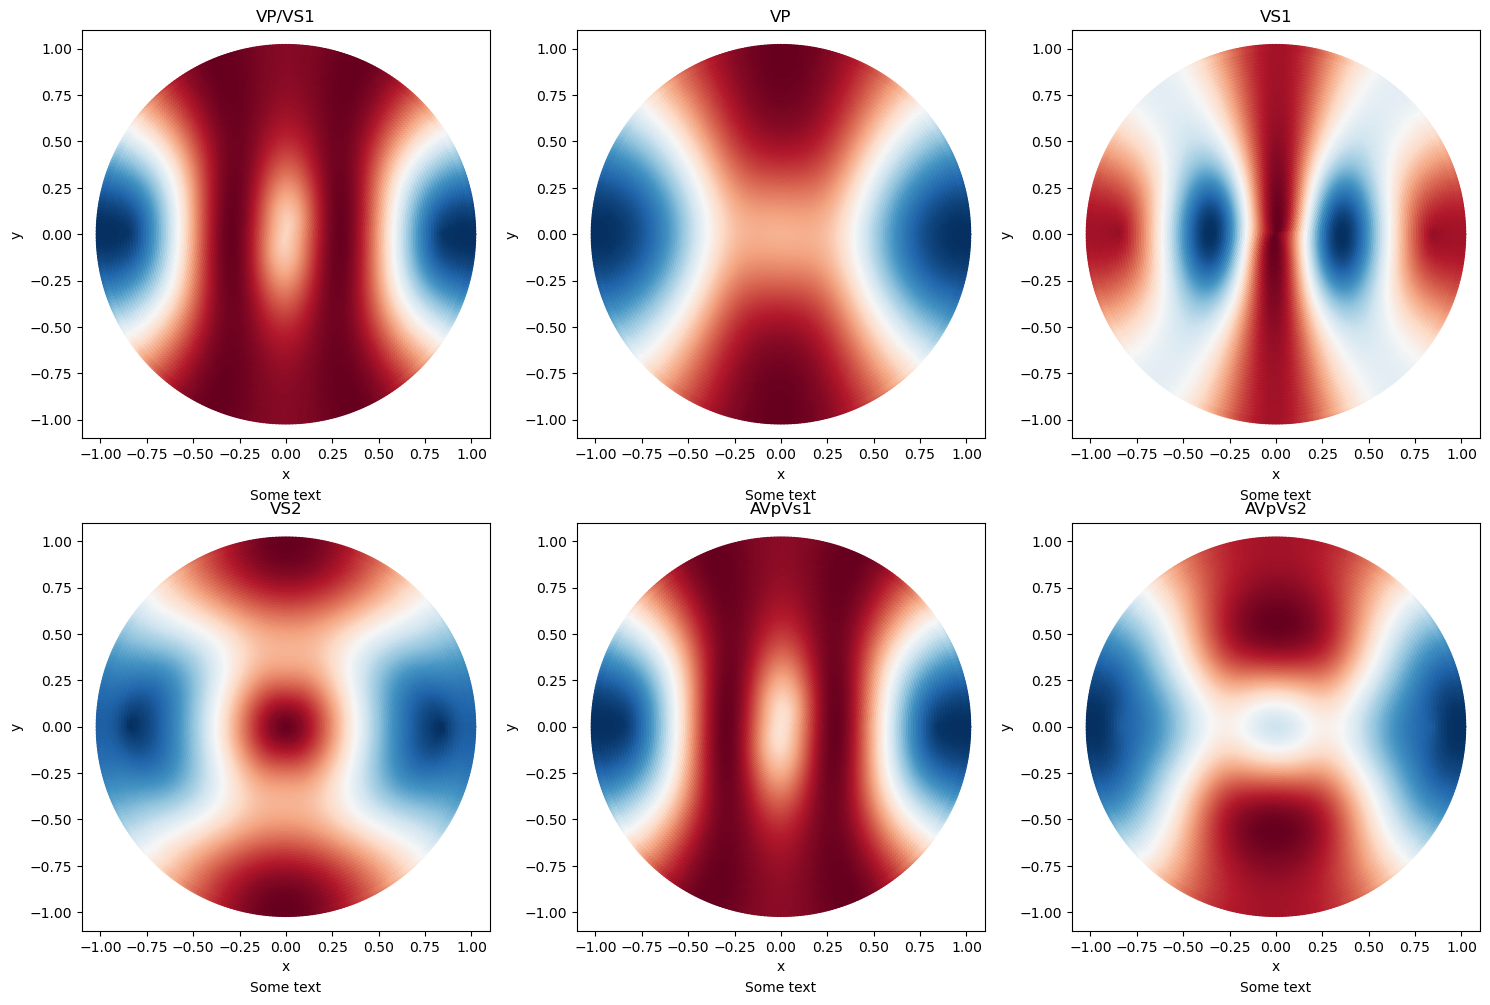

In [25]:
t.plot()

In [27]:
rho

3335.6773480519028